<a href="https://colab.research.google.com/github/vidhipitroda/Sentiment_analysis/blob/master/1099820_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#initally library are imported
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Import the pandas library to read our dataset 
import pandas as pd
# Get the train/test split package from sklearn for preparing our dataset to # train and test the model with 
from sklearn.model_selection import train_test_split
# Import the numpy library to work with and manipulate the data 
# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import nltk 
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
# Imported the necessary libraries
import csv
import urllib.request as urllib2

import matplotlib.pyplot as plt
from nltk import FreqDist
import pandas as pd
# Importing data using url
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)

# reading data using pandas and converting into dataframe
df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,121870,6531,Just another generic drama that has nothing go...,1
1,57672,2907,"only improves on it , with terrific computer g...",3
2,146832,7988,a typical Bible killer story,1
3,34032,1599,You may feel compelled to watch the film twice...,3
4,155797,8527,left on a remote shelf indefinitely,1


In [0]:
#Now the dataset is splitted into 70:30 ratio and random state is set to 2003
X_train, X_test, Y_train, Y_test = train_test_split(df ['Phrase'], df ['Sentiment'], test_size=0.3, random_state=2003)

x_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(Y_train)
train_data = pd.concat([x_train,y_train],axis=1)
#values of different classes is counted in training dataset. 
train_data['Sentiment'].value_counts()
#documents[0]


2    55497
3    23151
1    19115
4     6475
0     5004
Name: Sentiment, dtype: int64

In [0]:
#Upsampling and down sampling is performed to reduce imbalancing
from sklearn.utils import resample
#cls_2, cls_3, cls_1, cls_4, cls_0 = data['Sentiment'].value_counts()
df_majority = train_data[train_data.Sentiment==1]
df_minority = train_data[train_data.Sentiment==4]
df_minor_0 =  train_data[train_data.Sentiment==0]
df_down_3 = train_data[train_data.Sentiment==3]
df_down_2 =train_data[train_data.Sentiment==2]
# Upsample minority class
df_minority_upsampled_4 = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= 10000,    # to match majority class
                                 random_state=123) # reproducible results

#print(df_minority_upsampled_4.Sentiment.value_counts())
df_minor_0 =  train_data[train_data.Sentiment==0]
df_minority_upsampled_0 = resample(df_minor_0, 
                                 replace=True,     # sample with replacement
                                 n_samples=19089,    # to match majority class
                                 random_state=123) 
df_minority_upsampled_0.Sentiment.value_counts()
df_down_3 = train_data[train_data.Sentiment==3]
df_down_2 = train_data[train_data.Sentiment==2]
#df_minority_upsampled_3 = resample(df_down_3, replace=False,n_samples=1536, random_state=123)
df_minority_upsampled_2 = resample(df_down_2, 
                                 replace=False,     # sample with replacement
                                 n_samples=25466,    # to match majority class
                                 random_state=123)
#print(df_minority_upsampled_3.Sentiment.value_counts())
#print(df_minority_upsampled_2.Sentiment.value_counts())

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled_4,df_minority_upsampled_0,df_down_3,df_minority_upsampled_2])
df_upsampled.Sentiment.value_counts()
total_data = pd.concat([df_majority,df_upsampled])
total_data.Sentiment.value_counts()
#type(total_data)

NameError: ignored

In [0]:
#total_data[''].values.tolist
from sklearn.utils import shuffle
Total_data = shuffle(total_data)
type(Total_data)
X_train = np.array(Total_data['Phrase'].values.tolist())
type(X_train)

numpy.ndarray

In [0]:
#Converting the data into list
document_train=[] #stores the training data
document_test = [] #stores the testing data
X_train = np.array(train_data['Phrase'].values.tolist())
Y_train = np.array(train_data['Sentiment'].values.tolist())

#performing word tokenization on training data
for i in range(len(X_train)):
  document_train.append([list(word_tokenize(X_train[i])), Y_train[i]]) 
#performing word tokenization on testing data
X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  document_test.append([list(word_tokenize(X_test[i])), Y_test[i]]) 


In [0]:
type(X_train)

numpy.ndarray

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
def preprocess(data):


  porter = PorterStemmer() 
  lancaster=LancasterStemmer() 
  wordnet_lemmatizer = WordNetLemmatizer() 
  stopwords_en = stopwords.words("english") 
  punctuations="?:!.,;'\"-()"
#parameters to adjust to see the impact on outcome 
  remove_stopwords = True
  useStemming = True
  useLemma = False
  removePuncs = True
  for l in range(len(data)):                   #For each review document 
    label = data[l][1]                         #Save review label 
    tmpReview = []                                 #Placeholder list for new review 
  for w in data[l][0]:                       #For each word this is review 
    newWord = w                                   #Set newWork to be the updated word 
    if remove_stopwords and (w in stopwords_en):  #if the word is a stopword & we want to remove stopwords 
      continue                                    #skip the word and don’t had it to the normalized review 
    if removePuncs and (w in punctuations):       #if the word is a punc. & we want to remove punctuations 
      continue                                    #skip the word and don’t had it to the normalized review 
    if useStemming:
      #if useStemming is set to True 
      #Keep one stemmer commented out 
      #newWord = porter.stem(newWord) #User porter stemmer 
      newWord = lancaster.stem(newWord) #Use Lancaster stemmer 
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                     #Add normalized word to the tmp review 
  data[l] = (tmpReview, label)             #Update the reviews list with clean review 
  data[l] = (' '.join(tmpReview), label) 

  return data






In [0]:
train_X1 = preprocess(document_train)
data_train = pd.DataFrame(train_X1,columns=['text', 'sentiment'])
test_X = preprocess(document_test)
data_test = pd.DataFrame(test_X,columns=['text', 'sentiment'])

In [0]:
data_train['text']=[" ".join(text) for text in data_train['text'].values]
data_test['text']=[" ".join(text) for text in data_test['text'].values]

In [0]:
#all_data1 = Preprocess_data(X_test,Y_test)
#trainx['text']=[" ".join(0) for text in trainx['text'].values]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(analyzer='word', max_features = 2000,ngram_range=(1, 2)) 
#X = vectorizer.fit_transform(df["text"]) 
#Y = df['sentiment'] 
 
X_train = vectorizer.fit_transform(data_train['text']).toarray()
#Y_train = Y_train 
X_test = vectorizer.fit_transform(data_test['text']).toarray()
#Y_test = Y_test


In [0]:
y_train = data_train['sentiment']


In [0]:
# Converts the datasets to numpy arrays to work with our PyTorch model 
# X_train = np.array(X_train)
# X_train = X_train.toarray() 
# Y_train = np.array(Y_train)

# Convert the testing data 
# X_test = X_test.toarray() 
# Y_test = np.array(Y_test)
# print(x_train_np.shape)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

In [0]:
#Defining function for recall, precision and f1 score
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:
#Defining the parameters
batch_size = 64
num_classes = 5
epochs = 10

In [0]:
import keras
#one hot encoding on labels
Y_train = keras.utils.to_categorical(data_train['sentiment'], num_classes)
Y_test = keras.utils.to_categorical(data_test['sentiment'], num_classes)


In [0]:
Y_test #one hot encoding on labels

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
#importing libraries for model
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential


In [0]:
#Defining a model
model = Sequential()
#model.add(Embedding(2000,150))
model.add(Embedding(2000, 300, input_length=2000))
model.add(Conv1D(filters=32, kernel_size=3,
                 activation='relu'))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 2000, 300)         600000    
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1998, 32)          28832     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1996, 64)          6208      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1996, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1996, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 127744)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)               

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [0]:
#import time


history = model.fit(X_train, Y_train,
          batch_size=128,
          epochs=10)


Epoch 1/10
109242/109242 [==============================] - 50s 458us/step - loss: 1.2956 - acc: 0.5058 - f1_m: 0.2930 - precision_m: 0.5560 - recall_m: 0.2180
Epoch 2/10
109242/109242 [==============================] - 49s 452us/step - loss: 1.2735 - acc: 0.5080 - f1_m: 0.2897 - precision_m: 0.5858 - recall_m: 0.2096
Epoch 3/10
109242/109242 [==============================] - 50s 455us/step - loss: 1.2660 - acc: 0.5094 - f1_m: 0.2783 - precision_m: 0.5937 - recall_m: 0.1967
Epoch 4/10
109242/109242 [==============================] - 50s 459us/step - loss: 1.2612 - acc: 0.5106 - f1_m: 0.2804 - precision_m: 0.6029 - recall_m: 0.1974
Epoch 5/10
109242/109242 [==============================] - 50s 459us/step - loss: 1.2583 - acc: 0.5116 - f1_m: 0.2586 - precision_m: 0.6120 - recall_m: 0.1780
Epoch 6/10
109242/109242 [==============================] - 50s 461us/step - loss: 1.2555 - acc: 0.5120 - f1_m: 0.2460 - precision_m: 0.6366 - recall_m: 0.1671
Epoch 7/10
109242/109242 [==============

In [0]:
# _, accuracy = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
model.evaluate(X_test, Y_test, verbose=0)


[1.3090921267259177,
 0.5077747874749028,
 0.12288862390425302,
 0.6193516644965457,
 0.06980221282412748]

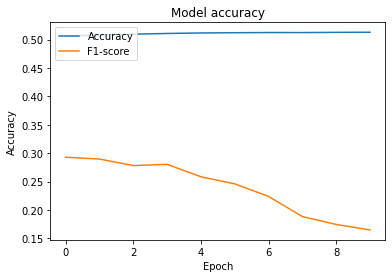

In [0]:
#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['f1_m'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'F1-score'], loc='upper left')
plt.show()

In [0]:
model.save("modelv_1099820.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from numpy import loadtxt
from keras.models import load_model
# load model
model1 = load_model('model_1099820.h5', custom_objects={'f1_m':f1_m,'precision_m':precision_m,'recall_m':recall_m })
# summarize model
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 150)         3000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1998, 250)         112750    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1994, 128)         160128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1994, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1994, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 255232)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)              